### Project: 911 Calls 

##### Description:

For this project, we will be analyzing Montogomery County, PA. 911 call data from Kaggle. 

##### data fields:

* lat: String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

#### Data and Setup

In [1]:
#  Import numpy and pandas 

import numpy as np
import pandas as pd

In [2]:
# Import visualization libraries and set %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# read our data

df = pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# get some info about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### the highest 5 zipcodes calling 911

In [11]:

df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### the highest towns (twp) calling 911

In [12]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### How many unique values are in the title column

In [16]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [17]:
len(df['title'].unique())

110

In [19]:
# another way

df['title'].nunique()

110

#### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.
*For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS. *

In [20]:
# this how to locate the reason

df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [21]:
x = df['title'].iloc[0]

In [22]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [23]:
x.split(':')[0]

'EMS'

In [25]:
# now we apply lambda expression 

df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [26]:
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [27]:
# most common reasons for calling 911

df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

#### let's demonstrate that in a bar plot, to see how our dataset looks like  

<AxesSubplot:xlabel='reason', ylabel='count'>

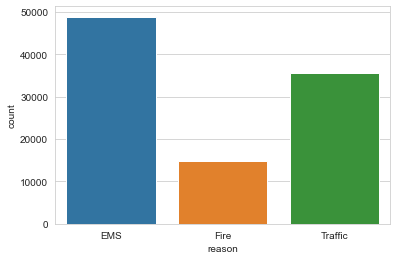

In [99]:
# basic code will be like 

sns.countplot (x='reason', data=df)

<AxesSubplot:xlabel='reason', ylabel='count'>

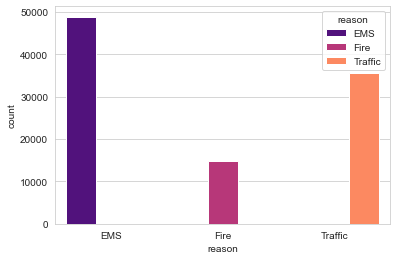

In [104]:
# same code after few arguments 

sns.countplot (x='reason', data=df,
              hue='reason',
               hue_order=['EMS','Fire','Traffic'],
               orient=None,
               color='#c5465b',
               palette='magma',
               saturation=1,
               dodge=True,)

#### what is the data type in the 'timeStamp' column

In [110]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [111]:
type(df['timeStamp'].iloc[0])

str

#### timestamps are strings. Use pd.to_datetime to convert the column from strings to DateTime objects. 

In [120]:
df['timeStamp']=  pd.to_datetime(df['timeStamp'])

In [122]:
# now we locate it again, and see it became timestamp object 

df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

Now that the timestamp column is actually DateTime objects. 
I will use .apply() to create 3 new columns called Hour, Month, and Day of Week. 
Then will create these columns based on the timeStamp column.

In [123]:
time = df['timeStamp'].iloc[0]

In [124]:
time.hour

17

In [125]:
time.day

10

In [126]:
time.month

12

In [127]:
# apply lambda expression for hour attribute

df['hour']= df['timeStamp'].apply(lambda time: time.hour)

In [129]:
# apply lambda expression for month attribute

df['month']= df['timeStamp'].apply(lambda time: time.month)

In [133]:
# apply lambda expression for the day of week attribute

df['day of week']= df['timeStamp'].apply(lambda time: time.dayofweek)

In [134]:
# to check out the new columns

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


#### we notice that day of the week is a number, let's change it to a string

In [138]:
# making week dictionary 

week = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [139]:
# use .map() method to guide our column to the dictionary 

df['day of week']= df['day of week'].map(week)

In [140]:
# check our data again, days changed to strings

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


#### now let's create a countplot of the Day of Week column with the hue based off of the Reason column

here we can see reasons for calls per day 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   reason       99492 non-null  object        
 10  hour         99492 non-null  int64         
 11  month        99492 non-null  int64         
 12  day of week  99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 9.9+ MB


<AxesSubplot:xlabel='day of week', ylabel='count'>

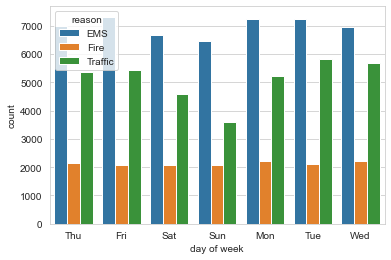

In [146]:
sns.countplot(x='day of week', 
              data=df,
             hue='reason',
             )

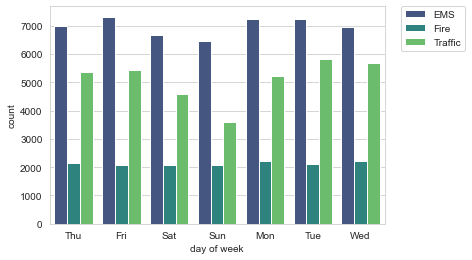

In [152]:
# after applying some arguments

sns.countplot(x='day of week',data=df,hue='reason',palette='viridis')

# change the legend location 

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

we can use the same method for 'month' 911 calls

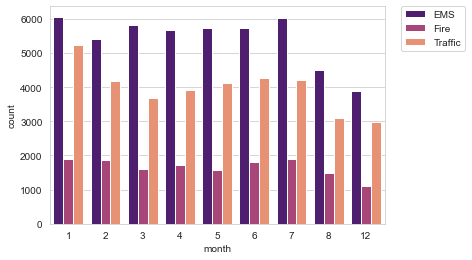

In [154]:
sns.countplot(x='month',data=df,hue='reason',palette='magma')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### notice few months were missing, I will create a gropuby object called byMonth.

#### where group the DataFrame by the month column and then use the count() method for aggregation. 

#### Use the head() method on this returned DataFrame 

In [156]:
# we will create a groupby object 

bymonth = df.groupby('month').count()

In [157]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


#### will create a simple plot with the dataset I have, that will fill some of the missing data

<AxesSubplot:xlabel='month'>

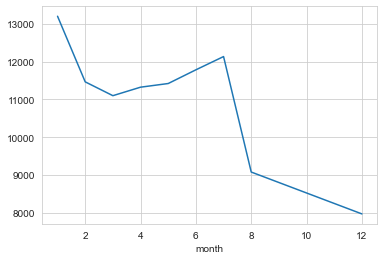

In [160]:
bymonth['lat'].plot()

# notice the difference between this plot and previous countplot
# countplot has missing 3 value bars equal 3 months
# nrxt plot will show data in more complete form.

#### now let's try creating a linear fit on the number of calls per month, and display it using .lmplot()

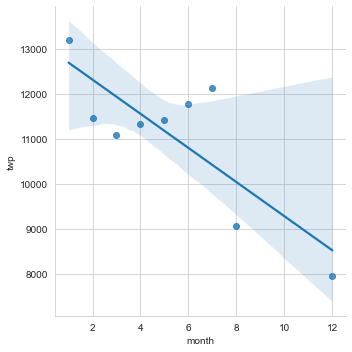

In [165]:
# we might need resetting index to a column, so seaborn will read month as an index

sns.lmplot(x='month',y='twp', data=bymonth.reset_index())

#### will create a new column 'date',contains the date from the timeStamp column

#### using .apply() along with .date() method

In [166]:
d = df['timeStamp'].iloc[0]

In [167]:
d

Timestamp('2015-12-10 17:40:00')

In [168]:
df['date'] = df['timeStamp'].apply(lambda d: d.date())

In [169]:
df.head()

# notice date column

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [170]:
df.groupby('date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


In [171]:
# let's grap the latittude column

df.groupby('date').count()['lat']

date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

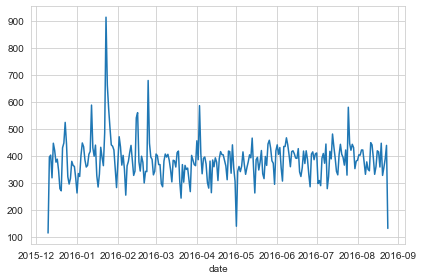

In [173]:
# if we plotted that it will look like this 

df.groupby('date').count()['lat'].plot()

plt.tight_layout()

#### grab traffic only 

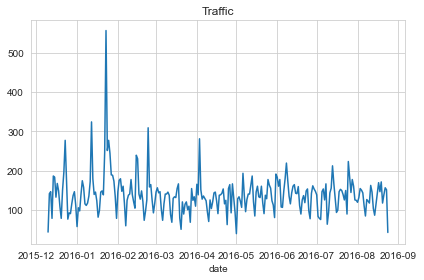

In [179]:
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()

plt.title('Traffic')
plt.tight_layout()

#### EMS only, then Fire.

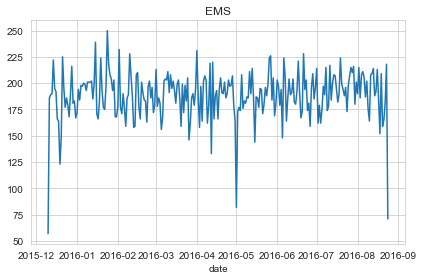

In [177]:
# EMS

df[df['reason']=='EMS'].groupby('date').count()['lat'].plot()

plt.title('EMS')
plt.tight_layout()

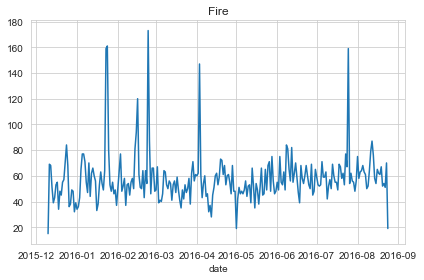

In [178]:
# Fire

df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()

plt.title('Fire')
plt.tight_layout()

#### let's create heatmaps with seaborn using our data

##### first need to restructure the dataframe in order the columns to become the Hours and the Index becomes the Day of the Week

##### I start by .groupby() then apply .unstack() method

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   reason       99492 non-null  object        
 10  hour         99492 non-null  int64         
 11  month        99492 non-null  int64         
 12  day of week  99492 non-null  object        
 13  date         99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 10.6+ MB


In [184]:
# group by day of week, hour 
# (multiple columns for multiple index)

df.groupby(['day of week', 'hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
day of week hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  reason  month  date  
day of week hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [185]:
df.groupby(['day of week', 'hour']).count()['reason']

day of week  hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: reason, Length: 168, dtype: int64

In [186]:
# now we use unstack method

df.groupby(['day of week', 'hour']).count()['reason'].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='hour', ylabel='day of week'>

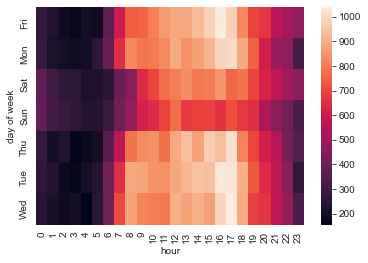

In [188]:
# notic how the grid became days and hours, and the number of calls are the filled information

dayhr = df.groupby(['day of week', 'hour']).count()['reason'].unstack()


sns.heatmap(data=dayhr)

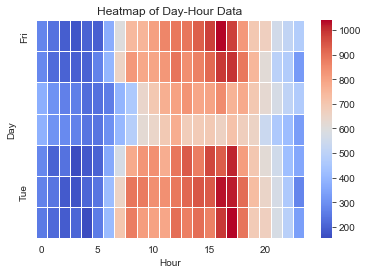

In [201]:
# now let's add some arrguments

sns.heatmap(data=dayhr,
            cmap='coolwarm',
            annot=False,
            fmt='10.2g',
            linewidths=0.5,
            linecolor='white',
            cbar=True,
            square=False,
            xticklabels=5,
            yticklabels=5,
            mask=dayhr < 5,  # Example threshold for hiding values below 10
            annot_kws={"fontsize": 8})

plt.title("Heatmap of Day-Hour Data")
plt.xlabel("Hour")
plt.ylabel("Day")

plt.show()

#### creating cluster map

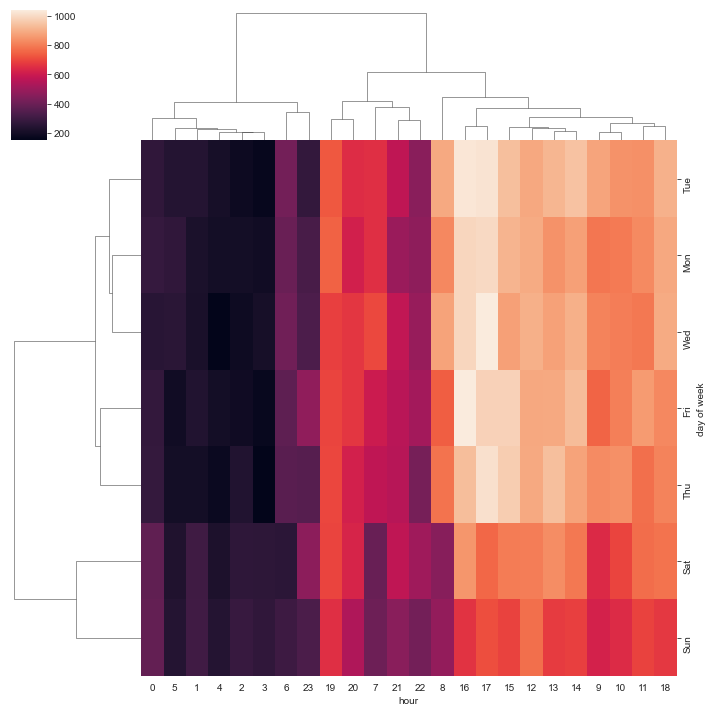

In [202]:
sns.clustermap(data=dayhr)

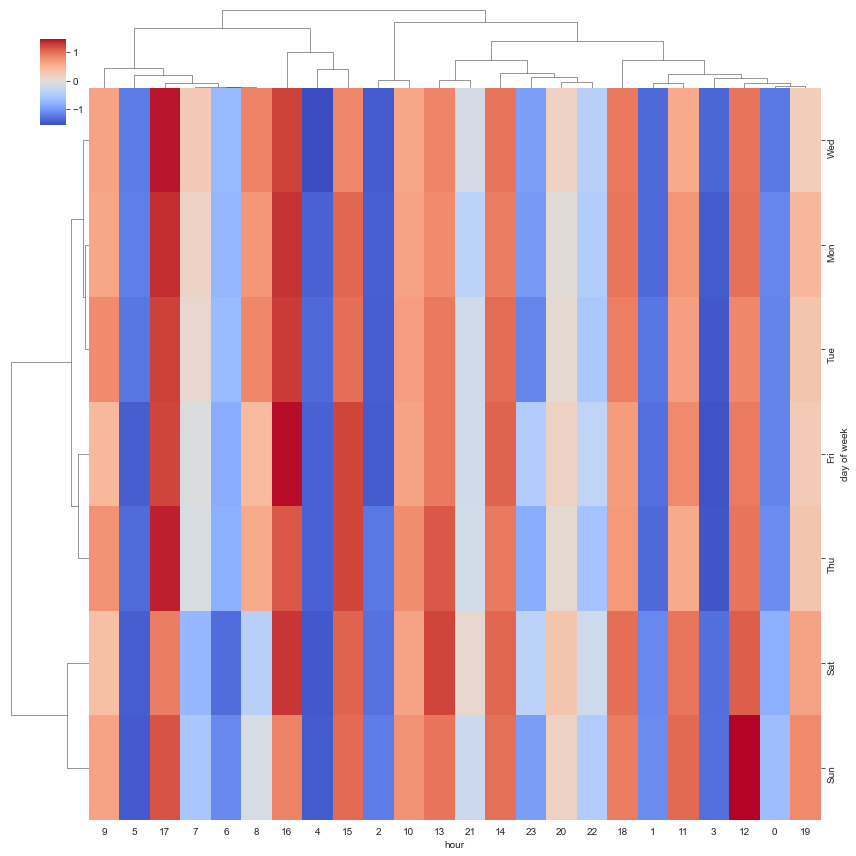

In [208]:
# cluster map after arguments 

sns.clustermap(data=dayhr,
               method='complete',
               metric='correlation',
               z_score=0,
               cmap='coolwarm',
               figsize=(12, 12),
               cbar_kws={'shrink': 0.5},
               row_cluster=True,
               col_cluster=True,
               dendrogram_ratio=0.1,
               colors_ratio=0.02,
               cbar_pos=(0.05, 0.85, 0.03, 0.1)
               )

#### we can redo the whole process using 'month' instead of 'hour'

In [210]:
# change 'hour' to 'month'

daymo = df.groupby(['day of week', 'month']).count()['reason'].unstack()


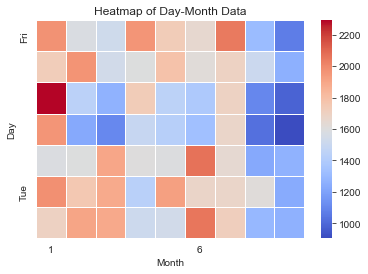

In [211]:
# heatmap

sns.heatmap(data=daymo,
            cmap='coolwarm',
            annot=False,
            fmt='10.2g',
            linewidths=0.5,
            linecolor='white',
            cbar=True,
            square=False,
            xticklabels=5,
            yticklabels=5,
            mask=dayhr < 5,  # Example threshold for hiding values below 10
            annot_kws={"fontsize": 8})

plt.title("Heatmap of Day-Month Data")
plt.xlabel("Month")
plt.ylabel("Day")

plt.show()

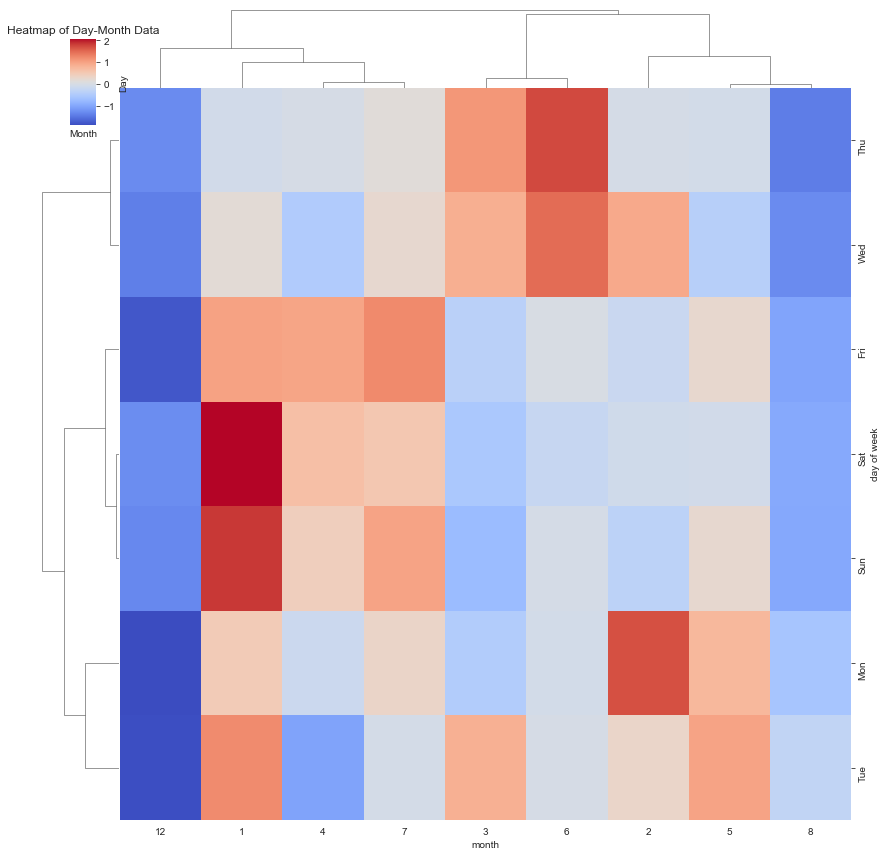

In [214]:
# cluster map

sns.clustermap(data=daymo,
               method='complete',
               metric='correlation',
               z_score=0,
               cmap='coolwarm',
               figsize=(12, 12),
               cbar_kws={'shrink': 0.5},
               row_cluster=True,
               col_cluster=True,
               dendrogram_ratio=0.1,
               colors_ratio=0.02,
               cbar_pos=(0.05, 0.85, 0.03, 0.1)
               )

plt.title("Heatmap of Day-Month Data")
plt.xlabel("Month")
plt.ylabel("Day")

plt.show()

### - - - - The End - - - - 